# SVM

De acuerdo a lo expresado en el video  __Algoritmo SVM/SVC__ publicado por Eunice Rodas y Alan Hurtarte tenemos que Support Vector Machine es un algoritmo de aprendizaje para resolución de problemas de clasificación y regresión.
El objetivo del algoritmo es encontrar un hiperplano. Lo cual se procederá a definir a continuación.

## Hiperplano

Un hiperplano es un límite de decisión que ayuda a clasificar los puntos de datos. Los puntos de datos que caen a ambos lados del hiperplano pueden atribuirse a varias clases. A continuación se presenta como se visualiza un hiperplano en dos y tres dimensiones.

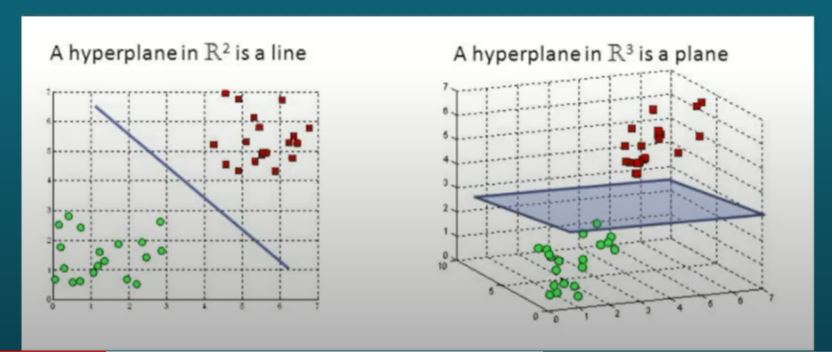

In [2]:
Image(filename="Hiperplano.jpg")

Tenemos un problema donde tenemos que clasificar datos en dos categorías, la mejor forma es trazando una línea entre las dos categorías las cuales nos permitirán definir a dónde pertenece.
A esto se le llama la regla de la decisión, es decir hay un margen que me permite definir cuando un punto pertenece a una categoría o a otra como se ve en la siguiente imagen que fue extraída del video __Support Vector Machines Teoría Explicada__ hecho por Juan Carlos Girón y Jose Rolando Josué. (https://youtu.be/envRLLZmio8)

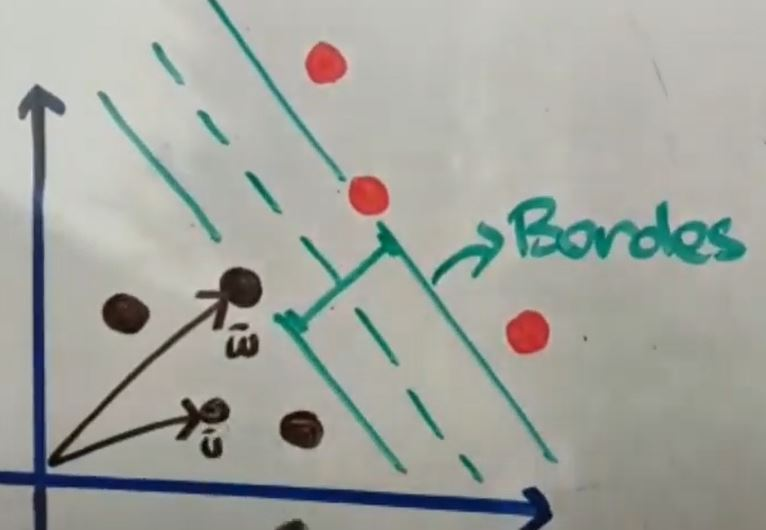

In [1]:
from IPython.display import Image
Image(filename="Imagen1.jpg")

Para lo cual se utiliza el principio de cálculo de distancia para los puntos que están a ambos lados de los bordes y se aplican las siguientes ecuaciones:
* Si está en la parte inferior (lo que está de color café oscuro)
$ \overrightarrow{w}\cdot \overrightarrow{v}+ b\ge 1 $
* Si está en la parte superior (está de color rojo)
$ \overrightarrow{w}\cdot \overrightarrow{v}+ b\le -1 $

Del video Support Vector Machine (https://youtu.be/P5lJTUXlTIY) obtenemos las siguientes ecuaciones de maximización del margen, el cual se define como

$\frac{2}{\left\| W \right\|}$

Lo cual proviene de la minimización de $\left\| W \right\|$ teniendo como datos claves los puntos ubicados a ambos bordes, los cuales se denotarán como X- y X+, los cuales al aplicarlos a la ecuación tenemos que: 

$\overrightarrow{x^{+}}-\overrightarrow{x^{-}}\cdot \frac{\overrightarrow{w}}{\left\| \overrightarrow{w} \right\|}$

Pero por lo visto en el punto anterior tenemos que:

$\overrightarrow{x}+b=1$
Entonces,
$\overrightarrow{x}=1-b$

Para maximizar $\frac{2}{\left\| W \right\|}$ lo que debemos hacer es minimizar el valor de ${\left\| W \right\|}$

Por conveniencia lo que se hará para minimizar el valor es que se elevará al cuadrado y se dividirá entre dos para garantizar un minimo global.

$\frac{\text{min} \left\| W \right\|^{2}}{2}$

Para resolver esto se usará el método de LaGrange

$\nabla f=\lambda\nabla g$
Entonces tenemos el lagrangiano
$L =\nabla f - \lambda\nabla g$

Lo cual se completa en la siguiente formula:

$L=\frac{\left\| W^{2} \right\|}{2}-\sum_{i}^{n}d_{i}y_{n}\left( \overrightarrow{w}\cdot \overrightarrow{x}+b \right)-1$




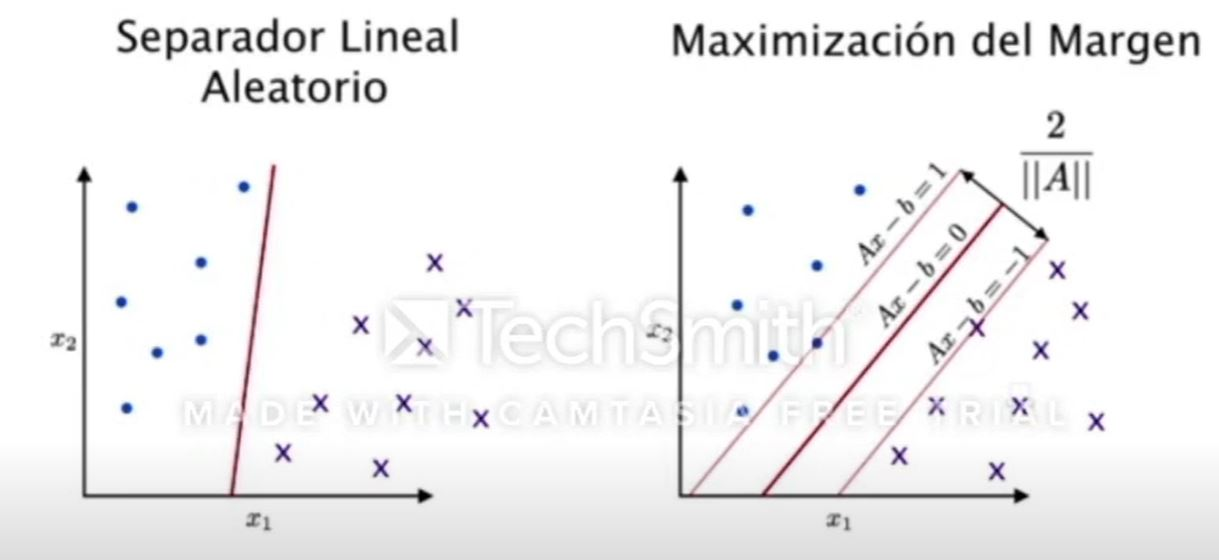

In [41]:
Image(filename="imagen3.jpg")

Cuando no hay una manera lineal de separar los puntos, existe algo llamado Kernel en el cual se trasforma los datos.

### Ejemplo
Basado en el video https://youtu.be/01hse_MOx0g

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

%matplotlib inline

In [9]:
datosBancarios= pd.read_csv("data_banknote_authentication.txt")
datosBancarios.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [10]:
datosBancarios.shape

(1372, 5)

#### Preprocesamiento de datos

In [11]:
x=datosBancarios.drop("Class", axis=1)
x.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [13]:
y=datosBancarios["Class"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### Dividiendo datos en set de entrenamiento y pruebas

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [18]:
print("SET DE X: La forma que tiene x_train es: ", x_train.shape, "la forma que tiene x_test es: ", x_test.shape)
print("SET DE Y: La forma que tiene y_train es: ", y_train.shape, "la forma que tiene y_test es: ", y_test.shape)

SET DE X: La forma que tiene x_train es:  (1097, 4) la forma que tiene x_test es:  (275, 4)
SET DE Y: La forma que tiene y_train es:  (1097,) la forma que tiene y_test es:  (275,)


#### Entrenando el modelo SVC

In [19]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Haciendo predicciones

In [20]:
y_pred = svc_classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("Accuracy del set de entrenamiento en SVC: {:.2f}".format(svc_classifier.score(x_train, y_train)))
print('Accuracy del set de prueba en SVC: {:.2f}'.format(svc_classifier.score(x_test, y_test)))

[[158   1]
 [  1 115]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       116

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy del set de entrenamiento en SVC: 0.99
Accuracy del set de prueba en SVC: 0.99


**Por la matriz de confusión se puede observar que existe sólo una mala clasificación con el algoritmo de SVM.**

## Ejemplo 2 - Usando datos no lineales

In [26]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
print("La forma es de: ", iris_data.shape)

La forma es de:  (150, 4)


##### Preprocesamiento de datos

In [28]:
x = iris.data[:, :]
y = iris.target
print("El set de datos quedó de: X",x.shape," Y",y.shape)

El set de datos quedó de: X (150, 4)  Y (150,)


#### Dividiendo en set de entrenamiento y de pruebas

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)  
print("El set de datos quedó de: Entrenamiento ",x_train.shape," Pruebas ",x_test.shape)

El set de datos quedó de: Entrenamiento  (120, 4)  Pruebas  (30, 4)


#### Entrenando el modelo

In [31]:
svc_classifier = SVC(kernel='poly', degree=8)  
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Haciendo predicciones con Kernel Polinomial

In [32]:
y_pred = svc_classifier.predict(x_test)  
y_pred

array([2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 0, 0, 2, 2, 2])

In [34]:
print("Matriz de confusion: \n",confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("Accuracy del set de entrenamiento en SVC: {:.2f}".format(svc_classifier.score(x_train, y_train)))
print('Accuracy del set de prueba en SVC: {:.2f}'.format(svc_classifier.score(x_test, y_test)))

Matriz de confusion: 
 [[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy del set de entrenamiento en SVC: 0.99
Accuracy del set de prueba en SVC: 1.00


#### Ahora usando un Kernel Gaussian

In [35]:
svc_classifier = SVC(kernel='rbf')  
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
y_pred = svc_classifier.predict(x_test)  
y_pred

array([2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0,
       2, 0, 2, 0, 0, 2, 2, 2])

In [37]:
print("Matriz de confusion: \n",confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("Accuracy del set de entrenamiento en SVC: {:.2f}".format(svc_classifier.score(x_train, y_train)))
print('Accuracy del set de prueba en SVC: {:.2f}'.format(svc_classifier.score(x_test, y_test)))

Matriz de confusion: 
 [[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy del set de entrenamiento en SVC: 0.95
Accuracy del set de prueba en SVC: 1.00


#### Ahora usando un Kernel Sigmoid

In [38]:
svc_classifier = SVC(kernel='sigmoid')  
svc_classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred = svc_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [40]:
print("Matriz de confusion: \n",confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("Accuracy del set de entrenamiento en SVC: {:.2f}".format(svc_classifier.score(x_train, y_train)))
print('Accuracy del set de prueba en SVC: {:.2f}'.format(svc_classifier.score(x_test, y_test)))

Matriz de confusion: 
 [[ 0 14  0]
 [ 0  7  0]
 [ 0  9  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.23      1.00      0.38         7
           2       0.00      0.00      0.00         9

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30

Accuracy del set de entrenamiento en SVC: 0.36
Accuracy del set de prueba en SVC: 0.23


C:\Users\diego\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**En conclusión, el Kernel Sigmoid cuya naturaleza es devolver un 0 o un 1 es el que peores resultados devolvió**